In [18]:
import pandas as pd
import sklearn as sk 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sbn

In [19]:
data=pd.read_csv("framingham.csv")
print(data)

      male  age  education  currentSmoker  cigsPerDay  BPMeds   
0        1   39        4.0              0         0.0     0.0  \
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI   
0                   0             0         0    195.0  106.0   70.0  26.97  \
1                   0             0         0    250.0  121.0

In [20]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [21]:
data.shape

(4238, 16)

In [22]:
print(data.groupby('heartRate').size())

heartRate
44.0     1
45.0     2
46.0     1
47.0     1
48.0     5
        ..
122.0    2
125.0    3
130.0    1
140.0    1
143.0    1
Length: 73, dtype: int64


male                  Axes(0.125,0.712609;0.168478x0.167391)
age                Axes(0.327174,0.712609;0.168478x0.167391)
education          Axes(0.529348,0.712609;0.168478x0.167391)
currentSmoker      Axes(0.731522,0.712609;0.168478x0.167391)
cigsPerDay            Axes(0.125,0.511739;0.168478x0.167391)
BPMeds             Axes(0.327174,0.511739;0.168478x0.167391)
prevalentStroke    Axes(0.529348,0.511739;0.168478x0.167391)
prevalentHyp       Axes(0.731522,0.511739;0.168478x0.167391)
diabetes               Axes(0.125,0.31087;0.168478x0.167391)
totChol             Axes(0.327174,0.31087;0.168478x0.167391)
sysBP               Axes(0.529348,0.31087;0.168478x0.167391)
diaBP               Axes(0.731522,0.31087;0.168478x0.167391)
BMI                       Axes(0.125,0.11;0.168478x0.167391)
heartRate              Axes(0.327174,0.11;0.168478x0.167391)
glucose                Axes(0.529348,0.11;0.168478x0.167391)
TenYearCHD             Axes(0.731522,0.11;0.168478x0.167391)
dtype: object

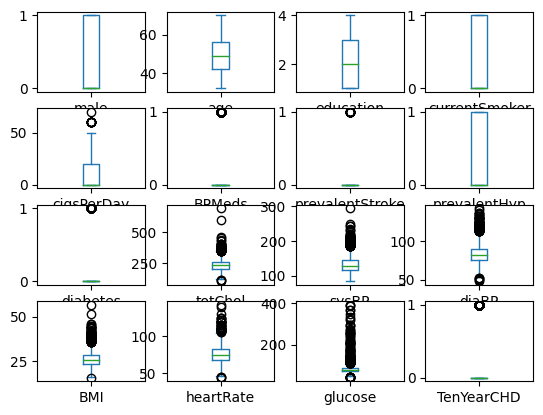

In [23]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

array([[<Axes: title={'center': 'male'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'currentSmoker'}>],
       [<Axes: title={'center': 'cigsPerDay'}>,
        <Axes: title={'center': 'BPMeds'}>,
        <Axes: title={'center': 'prevalentStroke'}>,
        <Axes: title={'center': 'prevalentHyp'}>],
       [<Axes: title={'center': 'diabetes'}>,
        <Axes: title={'center': 'totChol'}>,
        <Axes: title={'center': 'sysBP'}>,
        <Axes: title={'center': 'diaBP'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'heartRate'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'TenYearCHD'}>]], dtype=object)

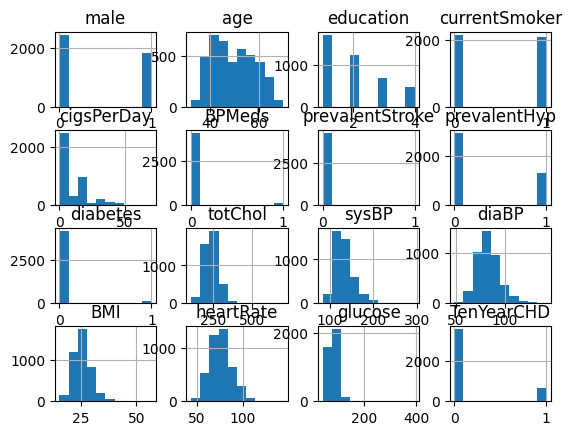

In [24]:
data.hist()

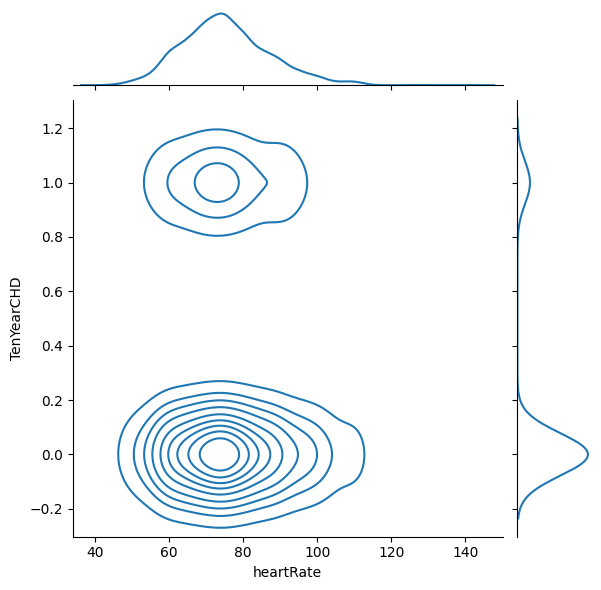

In [25]:
sbn.jointplot(x=data['heartRate'].head(2000), y=data['TenYearCHD'].head(2000), kind="kde")

<Axes: xlabel='TenYearCHD', ylabel='Density'>

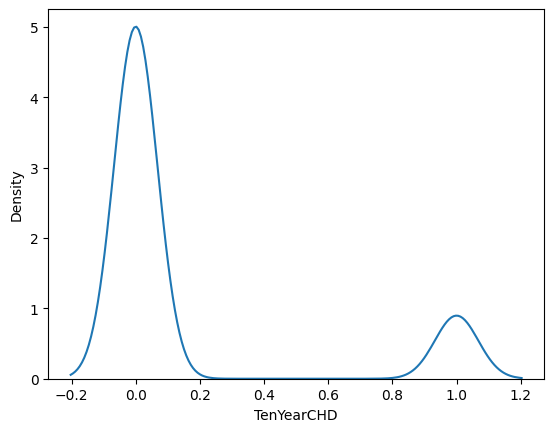

In [26]:
sbn.kdeplot(data=data['TenYearCHD'])

<Axes: xlabel='heartRate', ylabel='Density'>

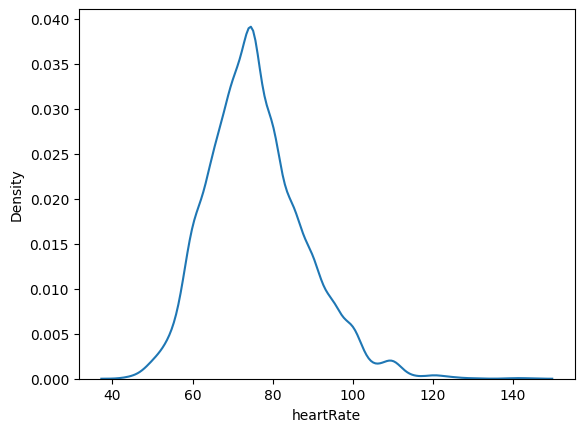

In [27]:
sbn.kdeplot(data=data['heartRate'])

/tmp/ipykernel_118719/2889313625.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sbn.kdeplot(data.head(200))


<Axes: ylabel='Density'>

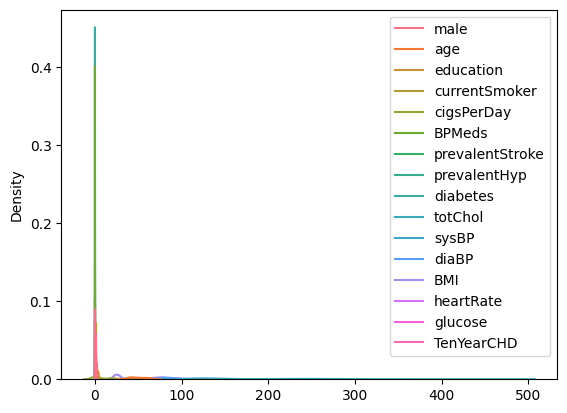

In [28]:
sbn.kdeplot(data.head(200))

In [29]:
colums=["currentSmoker","cigsPerDay","prevalentHyp","age","male","education","BPMeds"]

In [36]:
data=data.drop(colums,axis="columns")

In [37]:
print(data.head(3))

   prevalentStroke  diabetes  totChol  sysBP  diaBP    BMI  heartRate   
0                0         0    195.0  106.0   70.0  26.97       80.0  \
1                0         0    250.0  121.0   81.0  28.73       95.0   
2                0         0    245.0  127.5   80.0  25.34       75.0   

   glucose  TenYearCHD  
0     77.0           0  
1     76.0           0  
2     70.0           0  


(array([3594.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         644.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

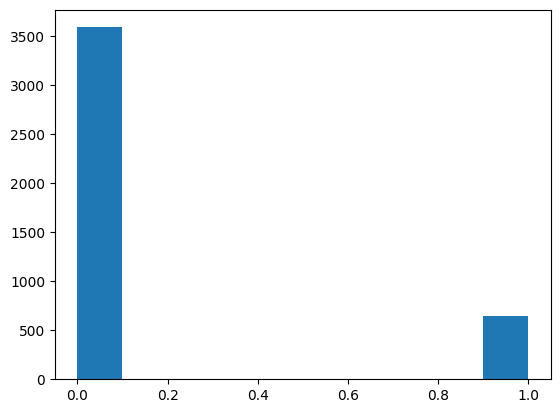

In [38]:
plt.hist(data["TenYearCHD"])

array([[<Axes: xlabel='prevalentStroke', ylabel='prevalentStroke'>,
        <Axes: xlabel='diabetes', ylabel='prevalentStroke'>,
        <Axes: xlabel='totChol', ylabel='prevalentStroke'>,
        <Axes: xlabel='sysBP', ylabel='prevalentStroke'>,
        <Axes: xlabel='diaBP', ylabel='prevalentStroke'>,
        <Axes: xlabel='BMI', ylabel='prevalentStroke'>,
        <Axes: xlabel='heartRate', ylabel='prevalentStroke'>,
        <Axes: xlabel='glucose', ylabel='prevalentStroke'>,
        <Axes: xlabel='TenYearCHD', ylabel='prevalentStroke'>],
       [<Axes: xlabel='prevalentStroke', ylabel='diabetes'>,
        <Axes: xlabel='diabetes', ylabel='diabetes'>,
        <Axes: xlabel='totChol', ylabel='diabetes'>,
        <Axes: xlabel='sysBP', ylabel='diabetes'>,
        <Axes: xlabel='diaBP', ylabel='diabetes'>,
        <Axes: xlabel='BMI', ylabel='diabetes'>,
        <Axes: xlabel='heartRate', ylabel='diabetes'>,
        <Axes: xlabel='glucose', ylabel='diabetes'>,
        <Axes: xlabel='Ten

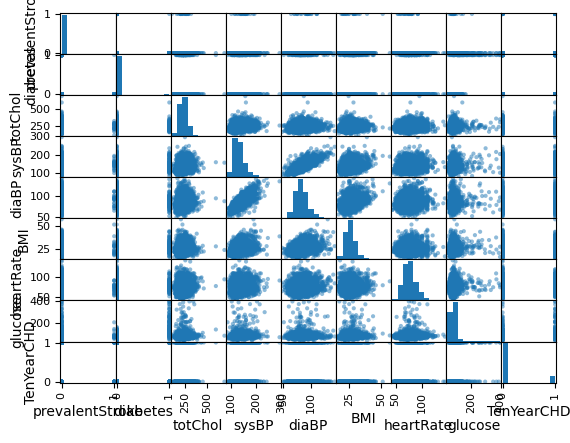

In [39]:
pd.plotting.scatter_matrix(data)